# **Dataset 1**

### **Import Packages**

In [20]:
import multiprocessing
import subprocess
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from Data_Generation.data_synthesizer import ds_generate_data
from Data_Generation.synthetic_data_vault import sdv_generate_data
from Data_Evaluation.utility import run_utility_eval



### **Exploratory Data Analysis**

In [21]:

data_path = "Original_Data/Dataset_1.csv"
original_data = pd.read_csv(data_path)
original_data.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [22]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [23]:
original_data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [24]:
original_data.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [25]:
# Check categorical columns
categorical_cols = original_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col, original_data[col].unique())

gender ['M' 'F']
NationalITy ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceofBirth ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID ['A' 'B' 'C']
Topic ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester ['F' 'S']
Relation ['Father' 'Mum']
ParentAnsweringSurvey ['Yes' 'No']
ParentschoolSatisfaction ['Good' 'Bad']
StudentAbsenceDays ['Under-7' 'Above-7']
Class ['M' 'L' 'H']


<Axes: xlabel='Class', ylabel='Count'>

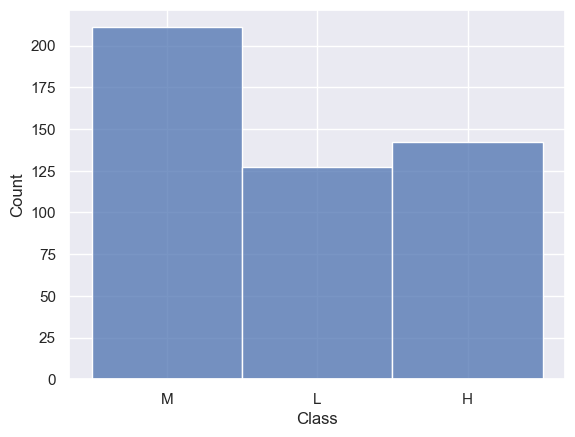

In [26]:
# Check class distribution
sns.histplot(original_data['Class'])

### **Synthetic Data Generation**

In [27]:
# Set the start method of the multiprocessing module to 'fork' to avoid an error
multiprocessing.set_start_method('fork', force=True)

# Number of samples to generate
n = 5000

# Split the data into train and test sets (70% train, 30% test) according to evaluation paper
train_data, test_data = train_test_split(original_data, test_size=0.3, random_state=42)
train_data.to_csv("Original_Data/train_data.csv", index=False)
test_data.to_csv("Original_Data/test_data.csv", index=False)

In [28]:
# Use train_data.csv to fit SDG models and generate synthetic data
data_path = "Original_Data/train_data.csv"
arguments = [data_path, str(n)]

print("Sampling synthpop...")
result = subprocess.run(['Rscript', 'Data_Generation/synthpop.R',   *arguments], capture_output=True, text=True)

print("Sampling DataSynthesizer...")
ds_generate_data(data_path=data_path, num_samples=n)

sdv_generate_data(data_path=data_path, num_samples=n)

Sampling synthpop...


Sampling DataSynthesizer...
================ Constructing Bayesian Network (BN) ================
Adding ROOT Discussion
Adding attribute Relation
Adding attribute AnnouncementsView
Adding attribute raisedhands
Adding attribute Semester
Adding attribute SectionID
Adding attribute VisITedResources
Adding attribute GradeID
Adding attribute StudentAbsenceDays
Adding attribute Class
Adding attribute PlaceofBirth
Adding attribute ParentAnsweringSurvey
Adding attribute StageID
Adding attribute Topic
Adding attribute ParentschoolSatisfaction
Adding attribute gender
Adding attribute NationalITy
========================== BN constructed ==========================
Fitting copula_gan...

Time taken to fit copula_gan: 8.80 seconds

Fitting ctgan...

Time taken to fit ctgan: 8.20 seconds

Fitting tvae...

Time taken to fit tvae: 2.17 seconds

Fitting gaussian_copula...

Time taken to fit gaussian_copula: 0.36 seconds



Encode all categorical columns of both original (train+test) data and synthetic data using label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

synthpop = pd.read_csv("Synthetic_Data/synthpop_samples.csv")
ds = pd.read_csv("Synthetic_Data/ds_samples.csv")
tvae = pd.read_csv("Synthetic_Data/tvae_samples.csv")
gaussian_copula = pd.read_csv("Synthetic_Data/gaussian_samples.csv")
copula_gan = pd.read_csv("Synthetic_Data/copula_gan_samples.csv")
ctgan = pd.read_csv("Synthetic_Data/ctgan_samples.csv")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

    synthpop[col] = le.fit_transform(synthpop[col])
    ds[col] = le.fit_transform(ds[col])
    tvae[col] = le.fit_transform(tvae[col])
    gaussian_copula[col] = le.fit_transform(gaussian_copula[col])
    copula_gan[col] = le.fit_transform(copula_gan[col])
    ctgan[col] = le.fit_transform(ctgan[col])

    label_encoders[col] = le


### **Utility Evaluation**

Run random forest classifier for utility evaluation

In [30]:
models = [synthpop, ds, tvae, gaussian_copula, copula_gan, ctgan]
model_names = ["synthpop", "ds", "tvae", "gaussian_copula", "copula_gan", "ctgan"]
rf_results = {}
for i, model in enumerate(models):
    print("Model: ", model_names[i])
    rf_results[model_names[i]] = run_utility_eval(train_data, test_data, model, "Class", "random_forest")
    print(rf_results[model_names[i]])

Model:  synthpop
{'acc_original': 0.8125, 'f1_original': 0.8122423783819387, 'acc_synth': 0.7291666666666666, 'f1_synth': 0.7282278252619349, 'acc_diff': 0.08333333333333337, 'f1_diff': 0.08401455312000383}
Model:  ds
{'acc_original': 0.8125, 'f1_original': 0.8122423783819387, 'acc_synth': 0.3472222222222222, 'f1_synth': 0.33788761671096573, 'acc_diff': 0.4652777777777778, 'f1_diff': 0.47435476167097296}
Model:  tvae
{'acc_original': 0.8125, 'f1_original': 0.8122423783819387, 'acc_synth': 0.6944444444444444, 'f1_synth': 0.6539073834551478, 'acc_diff': 0.11805555555555558, 'f1_diff': 0.15833499492679093}
Model:  gaussian_copula
{'acc_original': 0.8125, 'f1_original': 0.8122423783819387, 'acc_synth': 0.4444444444444444, 'f1_synth': 0.3852839663024848, 'acc_diff': 0.3680555555555556, 'f1_diff': 0.4269584120794539}
Model:  copula_gan
{'acc_original': 0.8125, 'f1_original': 0.8122423783819387, 'acc_synth': 0.2777777777777778, 'f1_synth': 0.21212370005473455, 'acc_diff': 0.5347222222222222, 

Run logistic regression for utility evaluation

In [31]:
lr_results = {}
for i, model in enumerate(models):
    lr_results[model_names[i]] = run_utility_eval(train_data, test_data, model, "Class", "logistic_regression")

for name in model_names:
    print(name)
    print(lr_results[name], "\n")

synthpop
{'acc_original': 0.7777777777777778, 'f1_original': 0.775057139888837, 'acc_synth': 0.7361111111111112, 'f1_synth': 0.7290608596964108, 'acc_diff': 0.04166666666666663, 'f1_diff': 0.04599628019242619} 

ds
{'acc_original': 0.7777777777777778, 'f1_original': 0.775057139888837, 'acc_synth': 0.4236111111111111, 'f1_synth': 0.37459927443685564, 'acc_diff': 0.3541666666666667, 'f1_diff': 0.4004578654519813} 

tvae
{'acc_original': 0.7777777777777778, 'f1_original': 0.775057139888837, 'acc_synth': 0.5902777777777778, 'f1_synth': 0.5457825485142583, 'acc_diff': 0.1875, 'f1_diff': 0.22927459137457862} 

gaussian_copula
{'acc_original': 0.7777777777777778, 'f1_original': 0.775057139888837, 'acc_synth': 0.4236111111111111, 'f1_synth': 0.34467389538661464, 'acc_diff': 0.3541666666666667, 'f1_diff': 0.4303832445022223} 

copula_gan
{'acc_original': 0.7777777777777778, 'f1_original': 0.775057139888837, 'acc_synth': 0.2222222222222222, 'f1_synth': 0.09039577433505469, 'acc_diff': 0.55555555

Run multilayer perceptron (MLP)

In [32]:
mlp_results = {}
for i, model in enumerate(models):
    mlp_results[model_names[i]] = run_utility_eval(train_data, test_data, model, "Class", "multilayer_perceptron")

for name in model_names:
    print(name)
    print(mlp_results[name], "\n")

synthpop
{'acc_original': 0.6944444444444444, 'f1_original': 0.6972228886348013, 'acc_synth': 0.7361111111111112, 'f1_synth': 0.7380874981154832, 'acc_diff': -0.04166666666666674, 'f1_diff': -0.040864609480681935} 

ds
{'acc_original': 0.6944444444444444, 'f1_original': 0.6972228886348013, 'acc_synth': 0.3611111111111111, 'f1_synth': 0.3256001429177553, 'acc_diff': 0.3333333333333333, 'f1_diff': 0.371622745717046} 

tvae
{'acc_original': 0.6944444444444444, 'f1_original': 0.6972228886348013, 'acc_synth': 0.6597222222222222, 'f1_synth': 0.5824049316696375, 'acc_diff': 0.03472222222222221, 'f1_diff': 0.11481795696516384} 

gaussian_copula
{'acc_original': 0.6944444444444444, 'f1_original': 0.6972228886348013, 'acc_synth': 0.375, 'f1_synth': 0.3113636363636364, 'acc_diff': 0.3194444444444444, 'f1_diff': 0.3858592522711649} 

copula_gan
{'acc_original': 0.6944444444444444, 'f1_original': 0.6972228886348013, 'acc_synth': 0.3472222222222222, 'f1_synth': 0.35164931093617635, 'acc_diff': 0.347

### **Resemblance**

Run multiple resemblance metrics: Difference in pairwise correlation, Jensen-Shannon divergence, Wasserstein distance

- Correlation distance diff : lower values are better
- JSD in [0,1] range: lower values are better
- WD: lower values are better


**Difference in pairwise correlation:**

In [33]:
from Data_Evaluation.resemblance import pairwise_correlation_diff, jsd, wd


for i, model in enumerate(models):
    print("Model: ", model_names[i])
    print("Difference in pairwise correlation: ", pairwise_correlation_diff(train_data, model))

Model:  synthpop
Difference in pairwise correlation:  0.03044649284450908
Model:  ds
Difference in pairwise correlation:  0.1548317543906502
Model:  tvae
Difference in pairwise correlation:  0.13187022437364868
Model:  gaussian_copula
Difference in pairwise correlation:  0.09897394808803735
Model:  copula_gan
Difference in pairwise correlation:  0.1475760953674992
Model:  ctgan
Difference in pairwise correlation:  0.1478983667884924


**Jensen-Shannon Divergence**

In [34]:
for i, model in enumerate(models):
    print("Model: ", model_names[i])
    print("Jensen-Shannon Divergence: ", jsd(train_data, model))

Model:  synthpop
Jensen-Shannon Divergence:  0.0010200122091258933
Model:  ds
Jensen-Shannon Divergence:  0.08615468308271802
Model:  tvae
Jensen-Shannon Divergence:  0.13845183660084823
Model:  gaussian_copula
Jensen-Shannon Divergence:  0.03465434129004913
Model:  copula_gan
Jensen-Shannon Divergence:  0.04668612862346193
Model:  ctgan
Jensen-Shannon Divergence:  0.037666168549691695


**Wasserstein Distance**

In [35]:
for i, model in enumerate(models):
    print("Model: ", model_names[i])
    print("Wasserstein Distance: ", wd(train_data, model)) 

Model:  synthpop
Wasserstein Distance:  0.004066175499157601
Model:  ds
Wasserstein Distance:  0.057473543376482084
Model:  tvae
Wasserstein Distance:  0.10575105732080411
Model:  gaussian_copula
Wasserstein Distance:  0.012057395912201629
Model:  copula_gan
Wasserstein Distance:  0.01981069074769075
Model:  ctgan
Wasserstein Distance:  0.018398505930607423


### **Privacy**

**Distance to closest record (DCR)**

In [36]:
from Data_Evaluation.privacy import dcr

for i, model in enumerate(models):
    print("Model: ", model_names[i])
    print("Avg. DCR: ", dcr(train_data, model, model_names[i], save_hist=True))
    

Model:  synthpop
Avg. DCR:  0.3728001
Model:  ds
Avg. DCR:  0.4117684
Model:  tvae
Avg. DCR:  0.37808326
Model:  gaussian_copula
Avg. DCR:  0.38095614
Model:  copula_gan
Avg. DCR:  0.38582563
Model:  ctgan
Avg. DCR:  0.38038638


<Figure size 640x480 with 0 Axes>

**Nearest Neighbor distance ratio (NNDR)**

In [37]:
from Data_Evaluation.privacy import nndr

for i, model in enumerate(models):
    print("Model: ", model_names[i])
    print("Avg. NNDR: ", nndr(train_data, model))

Model:  synthpop
Avg. NNDR:  0.7376254
Model:  ds
Avg. NNDR:  0.9011939
Model:  tvae
Avg. NNDR:  0.87096816
Model:  gaussian_copula
Avg. NNDR:  0.87677413
Model:  copula_gan
Avg. NNDR:  0.8868089
Model:  ctgan
Avg. NNDR:  0.8877282


**Membership Inference Attack (MIA)**

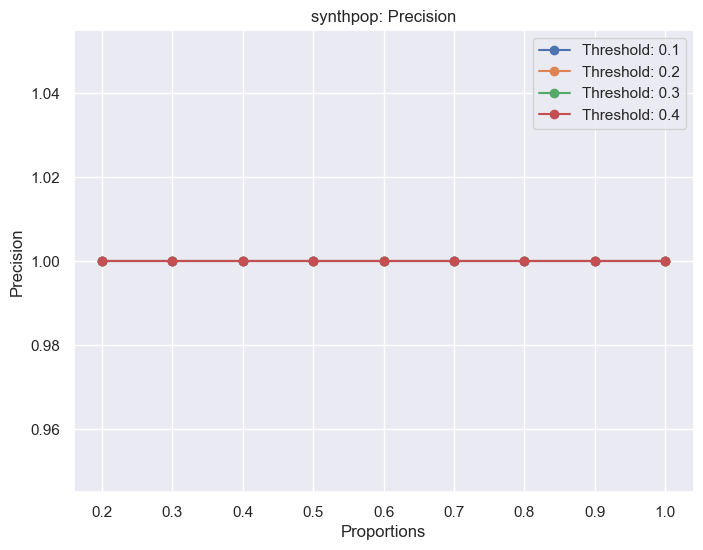

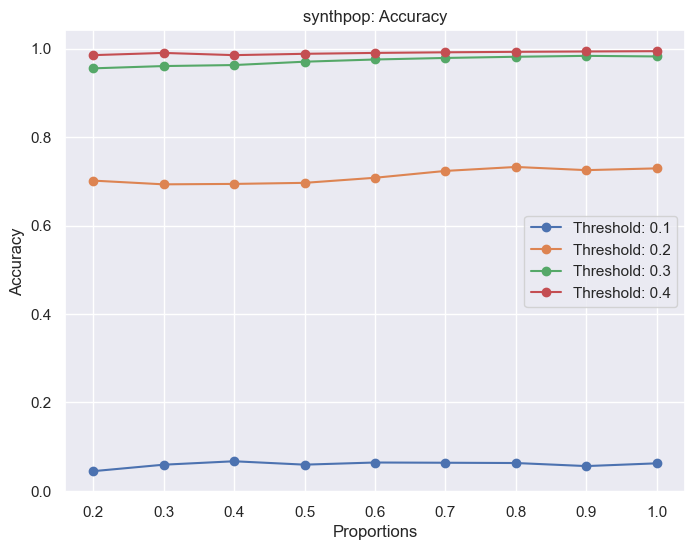

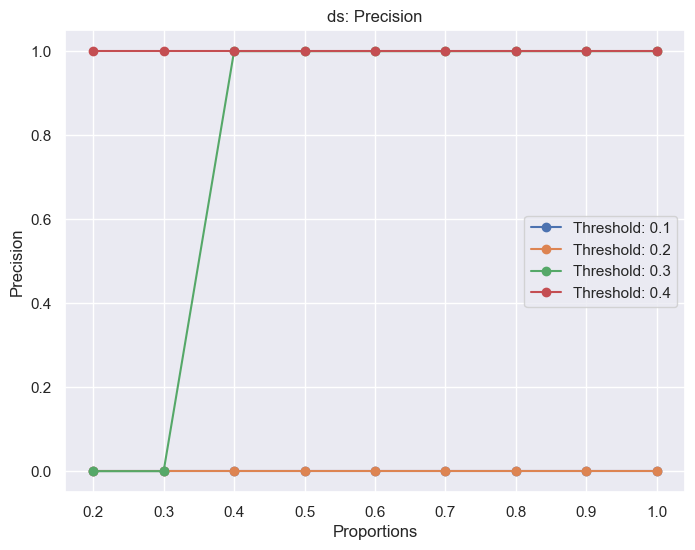

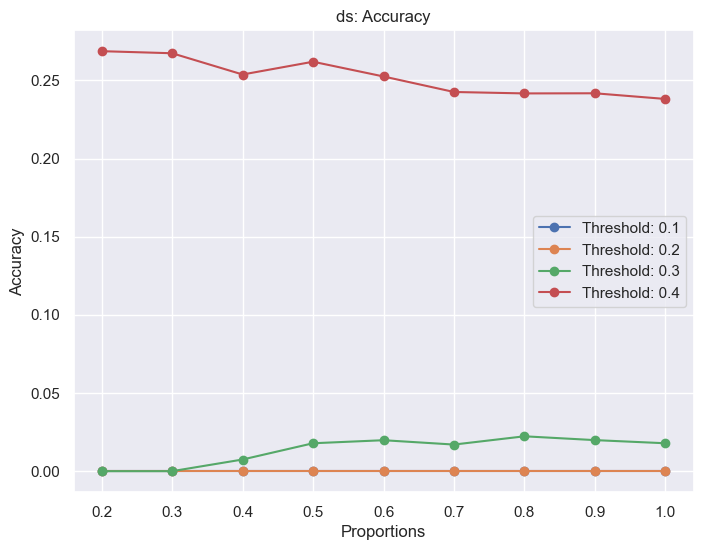

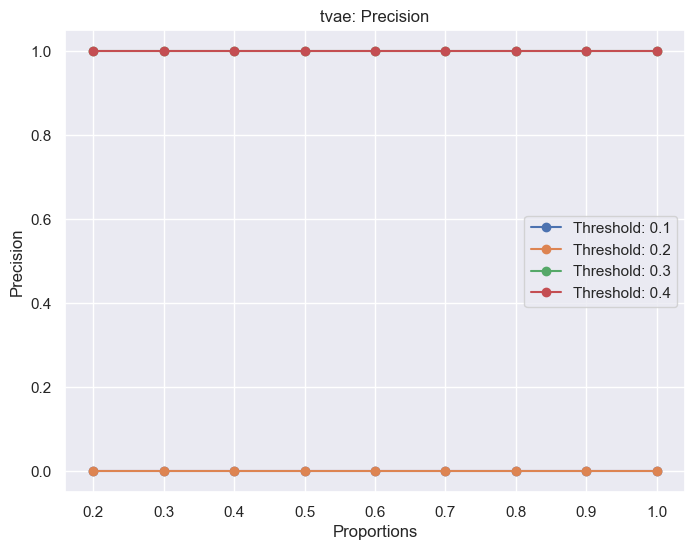

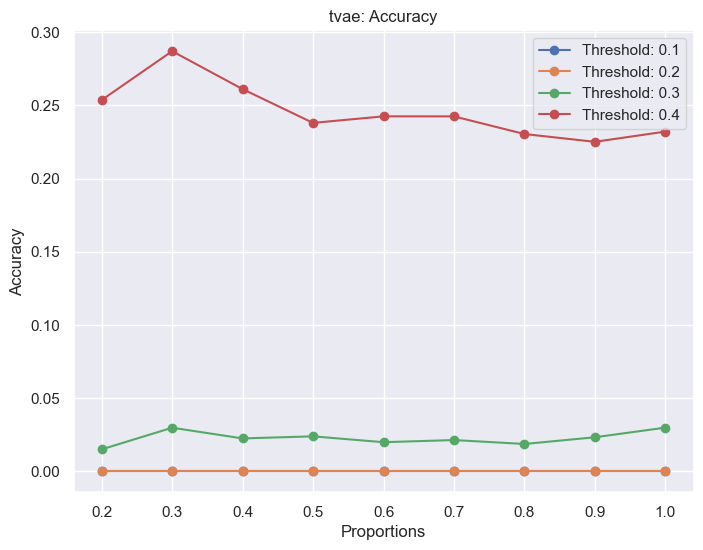

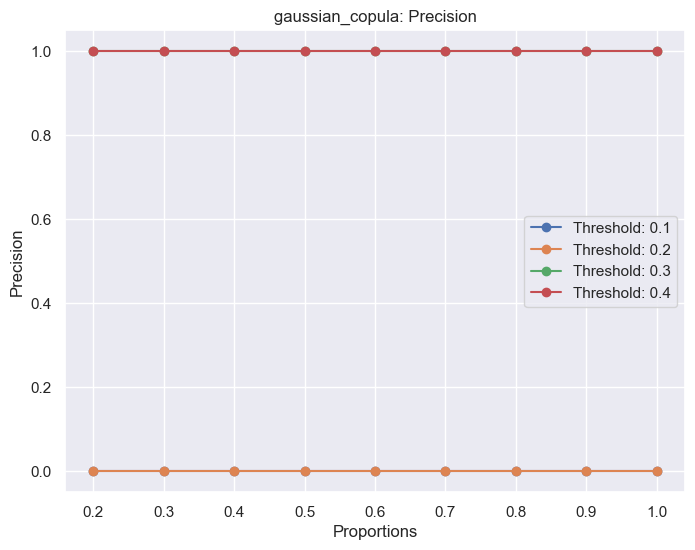

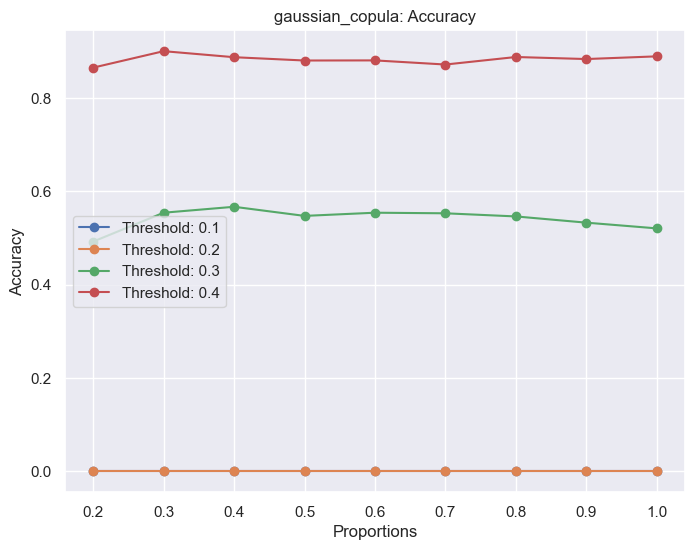

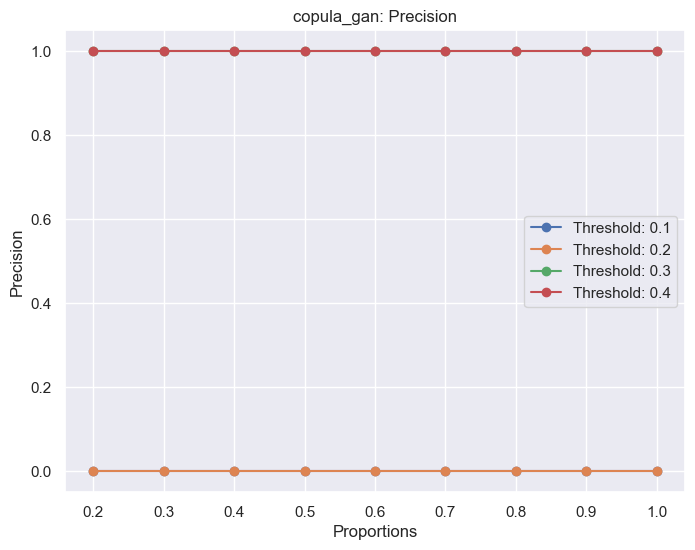

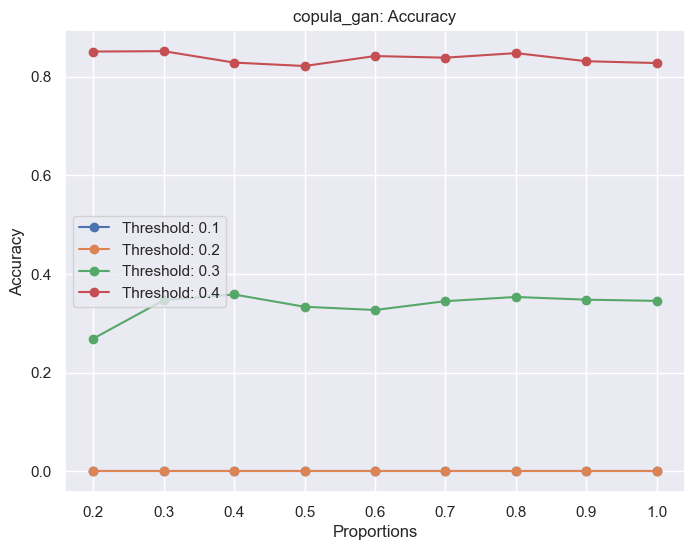

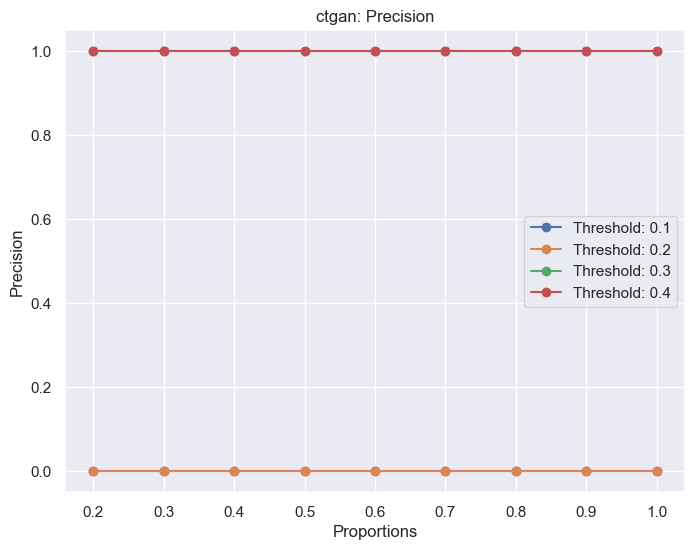

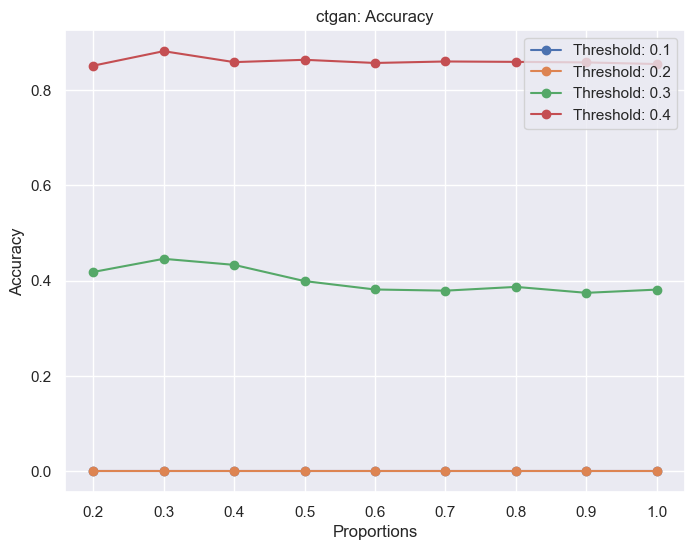

In [38]:
from Data_Evaluation.privacy import mia

mia_results = {}
for i, model in enumerate(models):
    mia_results[model_names[i] + "prec"], mia_results[model_names[i] + "acc"]= mia(train_data, model, model_names[i],save_plts=True)
